<a href="https://colab.research.google.com/github/ErikaRochadeAraujo/AnaliseRiscoCredito/blob/main/AnaliseRiscoCreditoMelhorada2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score


In [215]:
df = pd.read_csv('https://raw.githubusercontent.com/ErikaRochadeAraujo/AnaliseRiscoCredito/main/credit_risk.csv')

- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

Deutsche Mark

In [202]:
df.columns

Index(['default', 'conta_corrente', 'prazo_emprestimo_meses',
       'historico_credito', 'proposito_emprestimo', 'valor_emprestimo',
       'reserva_cc', 'tempo_emprego_atual', 'taxa_comp_salario',
       'sexo_est_civil', 'outros_fiadores', 'anos_residencia_atual',
       'propriedade', 'idade', 'outros_planos_financiamento',
       'tipo_residencia', 'n_creditos_banco', 'status_emprego',
       'n_dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

In [4]:
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [6]:
df.columns

Index(['default', 'conta_corrente', 'prazo_emprestimo_meses',
       'historico_credito', 'proposito_emprestimo', 'valor_emprestimo',
       'reserva_cc', 'tempo_emprego_atual', 'taxa_comp_salario',
       'sexo_est_civil', 'outros_fiadores', 'anos_residencia_atual',
       'propriedade', 'idade', 'outros_planos_financiamento',
       'tipo_residencia', 'n_creditos_banco', 'status_emprego',
       'n_dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

In [217]:
cred = df[['default','prazo_emprestimo_meses', 'valor_emprestimo', 'taxa_comp_salario', 'anos_residencia_atual','idade', 'n_creditos_banco', 'n_dependentes']]

# Precisamos tratar as colunas com dados categoricos

In [18]:
df['sexo_est_civil'].value_counts().unique

<bound method Series.unique of male : single                          548
female : divorced/separated/married    310
male : married/widowed                  92
male : divorced/separated               50
Name: sexo_est_civil, dtype: int64>

# Inconsistência nessa coluna
Aqui achamos um problema nos dados coletados.
Eles separam homens por estado civil, mas colocam as mulheres todas juntas, sem que se possa entender, no caso das mulheres quem é casada/divorciada/separada. Não havendo registro de mulheres solteiras?


Então decidi separar por sexo apenas em uma nova coluna.

In [218]:
cred['sexo'] = [0 if i == 'female : divorced/separated/married' 
                        else 1 for i in df['sexo_est_civil']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [205]:
cred['sexo'].value_counts().unique

<bound method Series.unique of 1    690
0    310
Name: sexo, dtype: int64>

# Para obter uma lista de variáveis categóricas


In [219]:
varCat = []

def getCategorica(df):
  for i in df.columns:
    if df[i].dtype == 'object':
      if i != 'sexo_est_civil':
        varCat.append(i)
  return varCat

In [220]:
varCat = getCategorica(df)

In [221]:
varCat

['conta_corrente',
 'historico_credito',
 'proposito_emprestimo',
 'reserva_cc',
 'tempo_emprego_atual',
 'outros_fiadores',
 'propriedade',
 'outros_planos_financiamento',
 'tipo_residencia',
 'status_emprego',
 'telefone',
 'trabalhador_estrangeiro']

# Vamos transformar todos categóricos

In [227]:
labelencoder = LabelEncoder()

dictCategorias = {}

for i in varCat:
  elementos = df[i].nunique()
  cred[i] = labelencoder.fit_transform(df[i])

  dictCategorias.update({i: labelencoder.inverse_transform(np.arange(elementos))})

In [228]:
dictCategorias

{'conta_corrente': array(['0 <= ... < 200 DM', '< 0 DM',
        '>= 200 DM / salary assignments for at least 1 year',
        'no checking account'], dtype=object),
 'historico_credito': array(['all credits at this bank paid back duly',
        'critical account/ other credits existing (not at this bank)',
        'delay in paying off in the past',
        'existing credits paid back duly till now',
        'no credits taken/ all credits paid back duly'], dtype=object),
 'proposito_emprestimo': array(['(vacation - does not exist?)', 'business', 'car (new)',
        'car (used)', 'domestic appliances', 'education',
        'furniture/equipment', 'radio/television', 'repairs', 'retraining'],
       dtype=object),
 'reserva_cc': array(['.. >= 1000 DM ', '... < 100 DM', '100 <= ... < 500 DM',
        '500 <= ... < 1000 DM ', 'unknown/ no savings account'],
       dtype=object),
 'tempo_emprego_atual': array(['.. >= 7 years', '... < 1 year ', '1 <= ... < 4 years',
        '4 <= ... < 7 yea

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [229]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   default                      1000 non-null   int64
 1   prazo_emprestimo_meses       1000 non-null   int64
 2   valor_emprestimo             1000 non-null   int64
 3   taxa_comp_salario            1000 non-null   int64
 4   anos_residencia_atual        1000 non-null   int64
 5   idade                        1000 non-null   int64
 6   n_creditos_banco             1000 non-null   int64
 7   n_dependentes                1000 non-null   int64
 8   sexo                         1000 non-null   int64
 9   conta_corrente               1000 non-null   int64
 10  historico_credito            1000 non-null   int64
 11  proposito_emprestimo         1000 non-null   int64
 12  reserva_cc                   1000 non-null   int64
 13  tempo_emprego_atual          1000 non-null   int6

In [230]:
cred.head(3)

,default,prazo_emprestimo_meses,valor_emprestimo,taxa_comp_salario,anos_residencia_atual,idade,n_creditos_banco,n_dependentes,sexo,conta_corrente,...,proposito_emprestimo,reserva_cc,tempo_emprego_atual,outros_fiadores,propriedade,outros_planos_financiamento,tipo_residencia,status_emprego,telefone,trabalhador_estrangeiro
0,0,6,1169,4,4,67,2,1,1,1,...,4,4,0,2,2,1,1,1,1,1
1,1,48,5951,2,2,22,1,1,0,0,...,4,1,2,2,2,1,1,1,0,1
2,0,12,2096,2,3,49,1,2,1,3,...,0,1,3,2,2,1,1,3,0,1


# Verificando idade onde podemos colocar por categoria 

In [234]:
cred['idade'].value_counts().unique

<bound method Series.unique of 27    51
26    50
23    48
24    44
28    43
25    41
30    40
35    40
36    39
31    38
29    37
32    34
33    33
34    32
37    29
22    27
40    25
38    24
42    22
39    21
46    18
43    17
47    17
44    17
41    17
45    15
20    14
21    14
49    14
50    12
48    12
54    10
57     9
52     9
51     8
55     8
63     8
61     7
53     7
60     6
65     5
58     5
64     5
66     5
74     4
67     3
68     3
56     3
59     3
75     2
19     2
62     2
70     1
Name: idade, dtype: int64>

In [235]:
cred['idade'].min()

19

In [240]:
df['idade'].max()

75

# vamos agrupar assim:
1 para menores que 20 anos

2 para menores que 30 anos

3 para menores que 40 anos

4 para menores que 50 anos

5 para menores que 60 anos

6 para menores que 70 anos

7 para menores que 80 anos

8 para maiores que 80

In [236]:
cred['idade'] = [1 if i <20  
                        else 1 if  i < 30
                               else 3 if i < 40
                                      else 4 if i < 50
                                             else 5 if i < 60
                                                    else 6 if i < 70 
                                                           else 7 if i < 80
                                                                  else 8 for i in cred['idade']]

In [238]:
cred['idade'].value_counts().unique

<bound method Series.unique of 1    371
3    330
4    174
5     74
6     44
7      7
Name: idade, dtype: int64>

# Criando funções para aplicar a Classificação dos dados 

In [241]:

def get_XY(df, target):
  X = df.drop(columns=[target])
  Y = df[target]
  return X, Y

def get_train_test(X, Y, ts=0.3, rs=42):
  x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=ts,
                                                    random_state=rs,
                                                    stratify=Y
                                                    )
  return x_train, x_test, y_train, y_test


def model_apply(model, x_train, y_train, x_test):
  model.fit(x_train, y_train)
  yHat = model.predict(x_test)
  return yHat


def evaluate_model(y_test, yHat):
  acuracia = accuracy_score(y_test, yHat)
  cfmx = confusion_matrix(y_test, yHat)
  sns.heatmap(pd.DataFrame(cfmx), annot=True,fmt='g')

  print('Accuracy: ', acuracia)
  print('------------------\n')
  plt.xlabel('P R E D I C T')
  plt.ylabel('R E A L')
  plt.show()

  return cfmx


def pipeline(df, target, model):
  X, Y = get_XY(df, target)
  x_train, x_test, y_train, y_test = get_train_test(X, Y)
  yHat = model_apply(model, x_train, y_train, x_test)
  cfmx = evaluate_model(y_test, yHat)
  return cfmx


def get_tree_graph(clf, colunas, class_names):
  fig = plt.figure(figsize=(40, 25))
  _ = plot_tree(clf,
            feature_names=colunas,
            class_names=class_names,
            filled=True)




Accuracy:  0.7
------------------



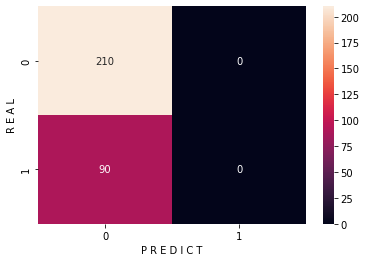

array([[210,   0],
       [ 90,   0]])

In [242]:
dummy_clf = DummyClassifier()
pipeline(cred, 'default', dummy_clf)

Accuracy:  0.6866666666666666
------------------



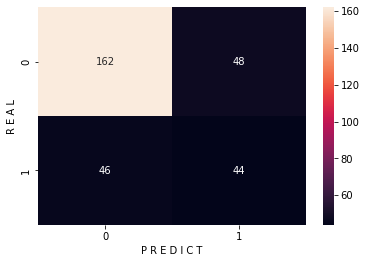

array([[162,  48],
       [ 46,  44]])

In [243]:
tree_clf = DecisionTreeClassifier()
pipeline(cred, 'default', tree_clf)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy:  0.7266666666666667
------------------



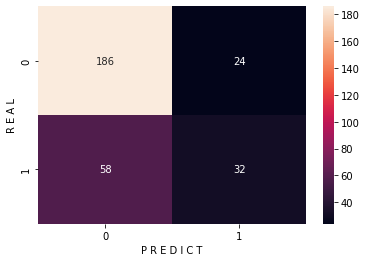

array([[186,  24],
       [ 58,  32]])

In [244]:
log_clf = LogisticRegression()
pipeline(cred, 'default', log_clf)

In [245]:
colunas = cred.drop(columns='default').columns
class_names = ['Empresta', 'Não empresta']

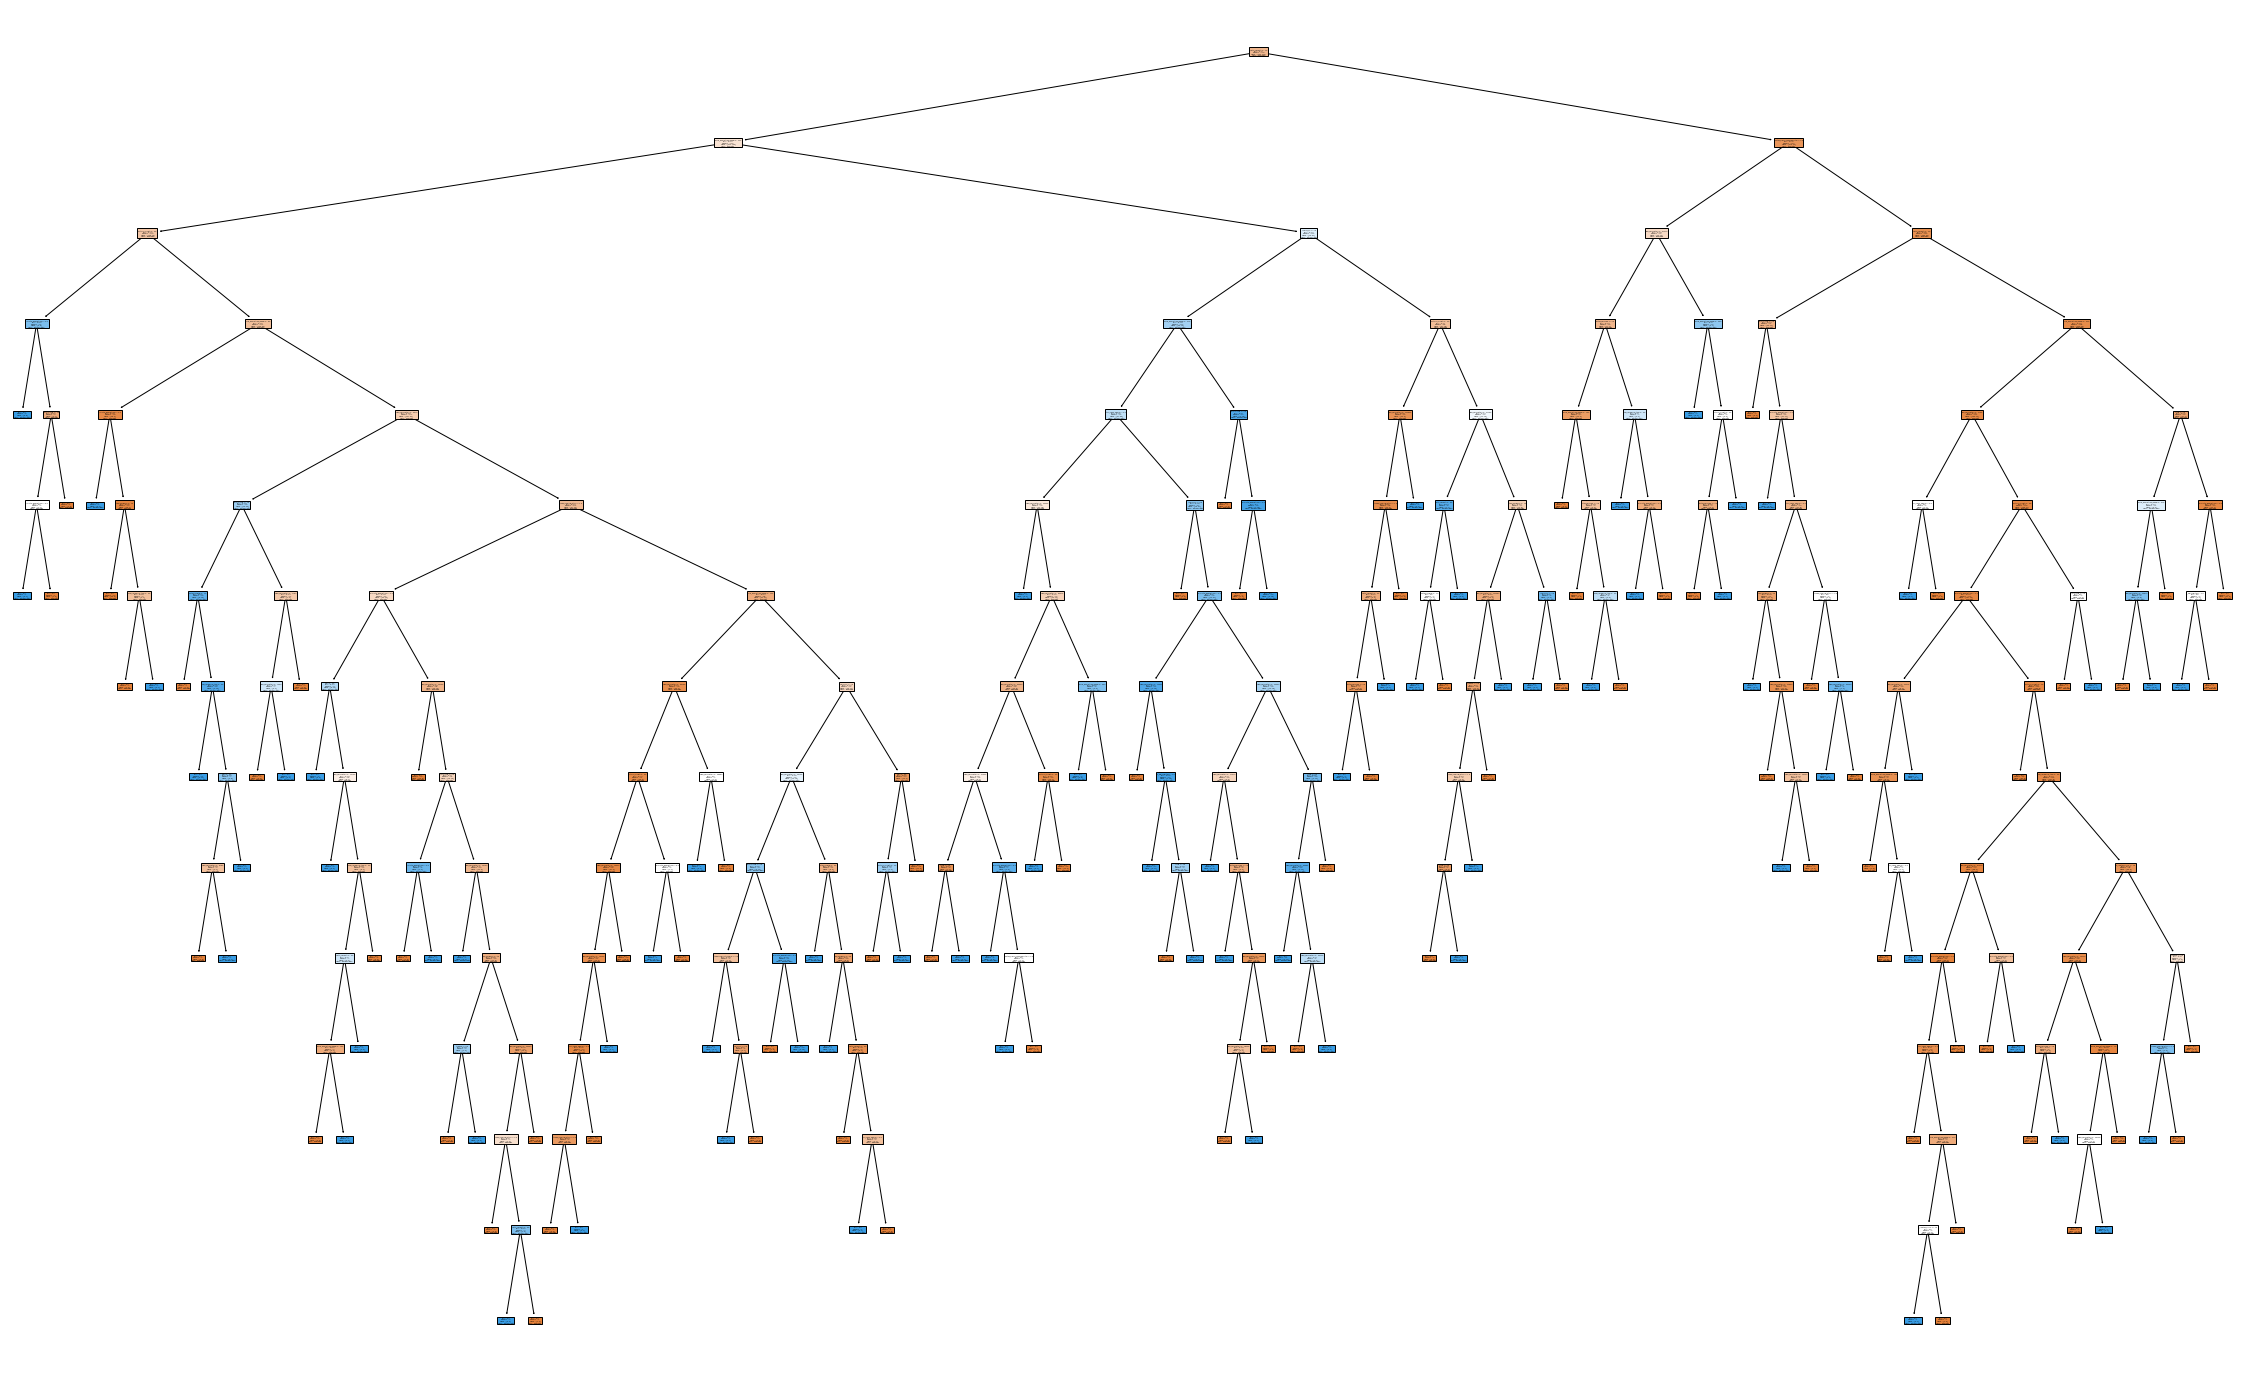

In [246]:
get_tree_graph(tree_clf, colunas, class_names)

min_samples_leaf - minimo de amostras q o nó precisa ter

# Esse foi o melhor resultado

Accuracy:  0.7266666666666667
------------------



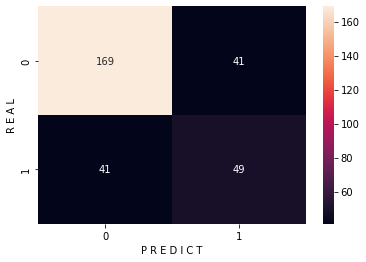

array([[169,  41],
       [ 41,  49]])

In [247]:
new_tree_clf = DecisionTreeClassifier(min_samples_leaf=10)
pipeline(cred, 'default', new_tree_clf)

In [ ]:
get_tree_graph(new_tree_clf, colunas, class_names)

Accuracy:  0.68
------------------



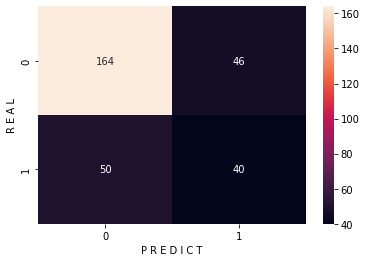

array([[164,  46],
       [ 50,  40]])

In [249]:
new_tree_clf = DecisionTreeClassifier(min_samples_leaf=10, criterion='entropy')
pipeline(cred, 'default', new_tree_clf)

In [ ]:
get_tree_graph(new_tree_clf, colunas, class_names)

Accuracy:  0.6833333333333333
------------------



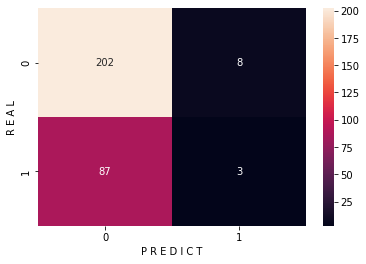

array([[202,   8],
       [ 87,   3]])

In [251]:
new_tree_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, criterion='entropy')
pipeline(cred, 'default', new_tree_clf)

In [ ]:
get_tree_graph(new_tree_clf, colunas, class_names)

In [266]:
dt = DecisionTreeClassifier()

In [267]:
params = {
    'max_depth': [5, 10, 20, 40], 
    'min_samples_leaf': [1, 2, 3, 5, 10, 20, 30], 
    'criterion': ['entropy', 'gini']
}

In [268]:
grd_tree = GridSearchCV(estimator=dt,
                        param_grid=params,
                        cv=10,
                        scoring='recall')

In [269]:
X, Y = get_XY(cred, 'default')
x_train, x_test, y_train, y_test = get_train_test(X, Y)

In [270]:
grd_tree.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 10, 20, 40],
                         'min_samples_leaf': [1, 2, 3, 5, 10, 20, 30]},
             scoring='recall')

In [272]:
grd_tree.best_estimator_

DecisionTreeClassifier(max_depth=10)

Accuracy:  0.7
------------------



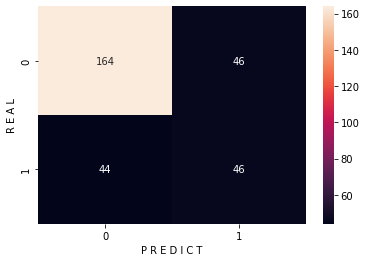

In [273]:
new_tree_clf = grd_tree.best_estimator_
cfmx = pipeline(cred, 'default', new_tree_clf)

In [ ]:
get_tree_graph(new_tree_clf, colunas, class_names)

# Métricas 
## Acurácia de falsos positivos e verdadeiros positivos (roc_auc_score)
## Acurácia simples
## Precisão
## Sensibilidade (Recall)


In [275]:
yhat_prob = log_clf.predict_proba(x_test)[:,1]
yhat = log_clf.predict(x_test)

In [276]:
def metricas(y_test, yhat_prob, yhat):
  #x_train, x_test, y_train, y_test = get_train_test(X, Y, ts=0.3, rs=42)
  rauc = roc_auc_score(y_test, yhat_prob)  * 100
  print('Acurácia de falsos positivos e verdadeiros positivos: ', rauc)
  auc = (accuracy_score(y_test, yhat) * 100)
  print('Acurácia: ', auc)
  print(classification_report(y_test, yhat))



In [277]:
metricas(y_test, yhat_prob, yhat)

Acurácia de falsos positivos e verdadeiros positivos:  73.55026455026457
Acurácia:  72.66666666666667
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       210
           1       0.57      0.36      0.44        90

    accuracy                           0.73       300
   macro avg       0.67      0.62      0.63       300
weighted avg       0.71      0.73      0.71       300



# aqui ainda estou escrevendo
# Validação cruzada

A ideia é dividir a massa de dados disponível em k partições (os tais "folds") e realizar k rodadas de treinamento e teste com essas combinações de dados.
 Assim, idealmente minimiza-se as chances de algum dado importante para a classificação ser deixado de fora durante o treinamento.


 Vms fazer uma função disso para deixar prático esse trabalho quando for preciso usar novamente.

In [280]:
def cross_validation(log_clf, cv_fold):
  x_train, x_test, y_train, y_test = get_train_test(X, Y, ts=0.3, rs=42)
  #cv_fold = StratifiedKFold(n_splits=10)
  cv_logistic = cross_val_score(log_clf, x_train, y_train, cv=cv_fold, scoring='accuracy')
  return cv_logistic
  


In [281]:
def compara_metrica(y_test, yhat, cv_logistic):
  acc = accuracy_score(y_test, yhat) * 100
  acc_cv = cv_logistic.mean()
  print(f'A acurácia do modelo é {acc} e a acurácia cross validada é {acc_cv}')

In [282]:
acc = accuracy_score(y_test, yhat) * 100

In [283]:
cv_fold = StratifiedKFold(n_splits=10)

In [284]:
cv_logistic = cross_validation(log_clf, cv_fold)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [285]:
cv_logistic.mean()

0.7114285714285714

In [286]:
compara_metrica(y_test, yhat, cv_logistic)

A acurácia do modelo é 72.66666666666667 e a acurácia cross validada é 0.7114285714285714


# Grid Search

In [287]:
params = {
    'max_iter': [50, 100, 500],
    'penalty': ['l1', 'l2']
}
logistic = LogisticRegression()
logict_cv = GridSearchCV(logistic, params, cv=10)
logict_cv.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'max_iter': [50, 100, 500], 'penalty': ['l1', 'l2']})

In [288]:
logict_cv.best_score_


0.7185714285714286

In [289]:
logict_cv.best_params_

{'max_iter': 50, 'penalty': 'l2'}

In [290]:
yhat = logict_cv.predict(x_test)

In [291]:
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
cred.to_csv("cred.csv")

